<h4>Explore How Weather Affects GDP in Agriculturally Based Economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress


Read in Merged GDP, Weather, and Temperature Data


In [2]:
path_weather_temperature_gdp = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(path_weather_temperature_gdp)
df["ISO3"] = df["ISO3"].astype("string")
df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09,6209.137625,6.209138
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09,6971.285595,6.971286
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09,9747.879532,9.747880
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10,10109.225814,10.109226
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10,12439.087077,12.439087


Filter Data Showing only top 10 Agriculturally Based Economies

In [3]:
agricultural_ISO3 = ["SLE", "TCD", "GNB", "COM", "CAF", "MLI", "NER", "SDN", "BDI", "ETH"]
agricultural_df = df[df.ISO3.isin(agricultural_ISO3)]
agricultural_df.head(100)


,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
297,297,BDI,Burundi,2005,70.857170,89.670074,1.117113e+09,1117.113046,1.117113
298,298,BDI,Burundi,2006,69.521495,113.152843,1.273375e+09,1273.375020,1.273375
299,299,BDI,Burundi,2007,69.279200,108.497519,1.356199e+09,1356.199365,1.356199
300,300,BDI,Burundi,2008,69.045200,99.705089,1.611836e+09,1611.835902,1.611836
301,301,BDI,Burundi,2009,70.191065,103.759156,1.781455e+09,1781.455092,1.781455
...,...,...,...,...,...,...,...,...,...
1657,1690,SLE,Sierra Leone,2012,79.433570,201.897354,3.801863e+09,3801.862611,3.801863
1658,1691,SLE,Sierra Leone,2013,79.832525,207.018927,4.920343e+09,4920.343195,4.920343
1659,1692,SLE,Sierra Leone,2014,79.657835,186.648337,5.015158e+09,5015.157816,5.015158
1660,1693,SLE,Sierra Leone,2015,79.951400,217.161513,4.218724e+09,4218.723875,4.218724


Create Stacked Line Charts for Each of the Countries of Interest Showing GDP, Temp & Prec Changes w/ Respect to Time

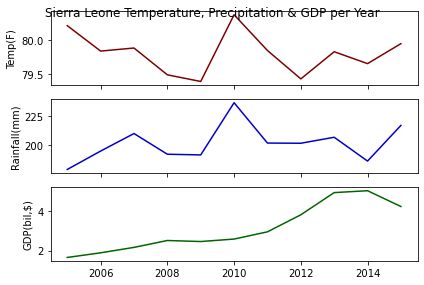

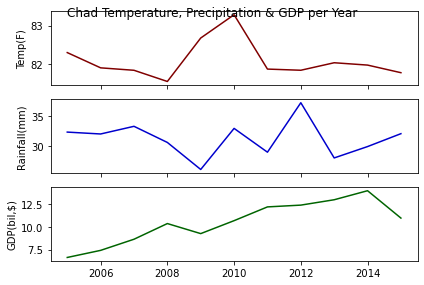

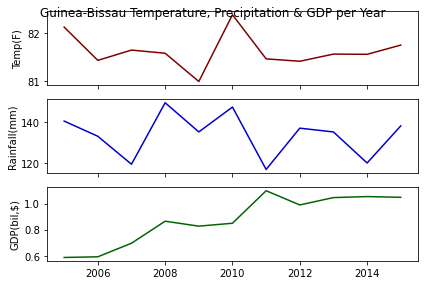

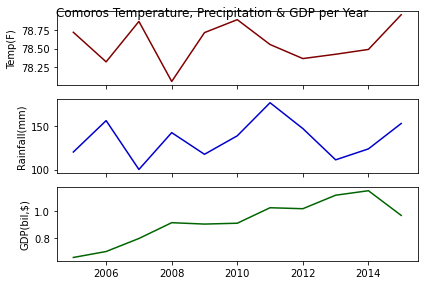

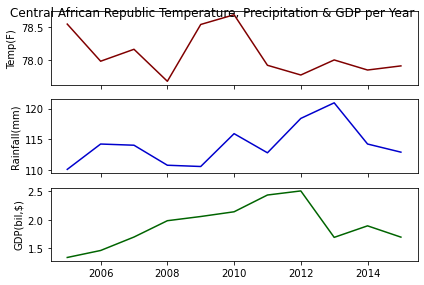

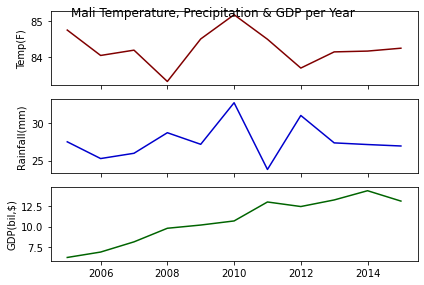

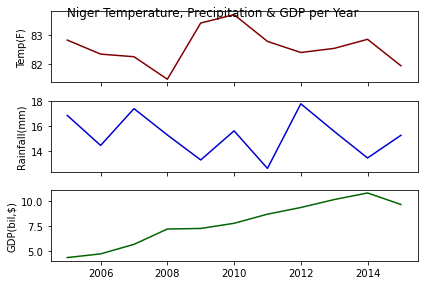

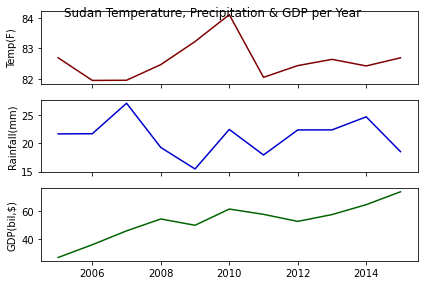

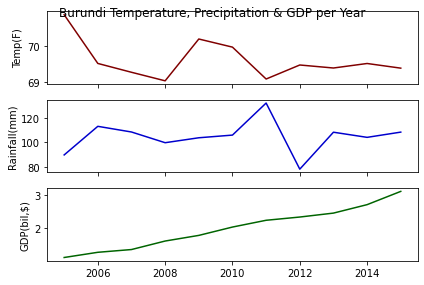

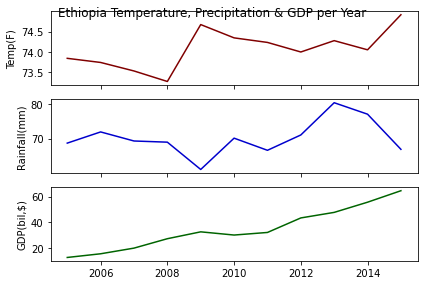

In [4]:
for code in agricultural_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    year_series = country_df["Year"]
    temp_series = country_df["Temp_Farenheit"]
    rain_series = country_df["Rainfall_mm"]
    gdp_series = country_df["GDP_bd"]
    
    fig, axs = plt.subplots(3, sharex=True, sharey=False)
    fig.suptitle(str(country_name) + " Temperature, Precipitation & GDP per Year")
    axs[0].plot(year_series, temp_series, color='Maroon')
    axs[1].plot(year_series, rain_series, color='MediumBlue')
    axs[2].plot(year_series, gdp_series, color='DarkGreen')
    axs[0].set_ylabel('Temp(F)')
    axs[1].set_ylabel('Rainfall(mm)')
    axs[2].set_ylabel('GDP(bil,$)')
    plt.tight_layout()
    plt.savefig("output_data/Q3/stacked_" + str(country_name + ".png"))

Create a GDP vs Temperature Plot for the top 10 Agriculturally Based Countries of Interest

Cov is -0.2449700671732434


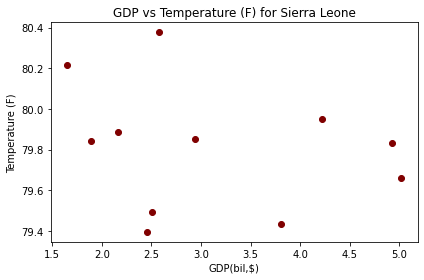

Cov is -0.150702072595448


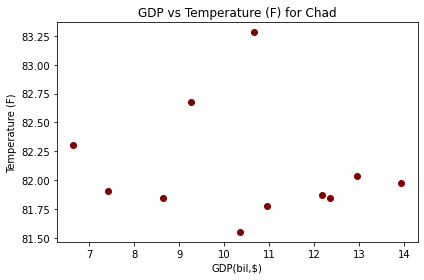

Cov is -0.20697207922324404


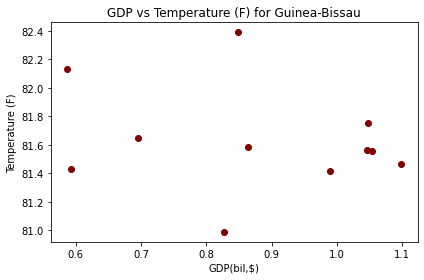

Cov is -0.17041676587869714


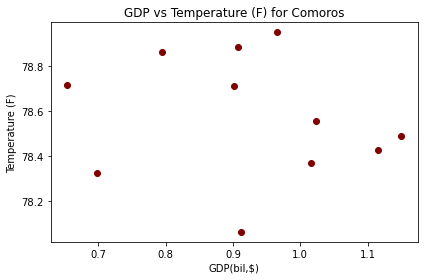

Cov is -0.2114723702006391


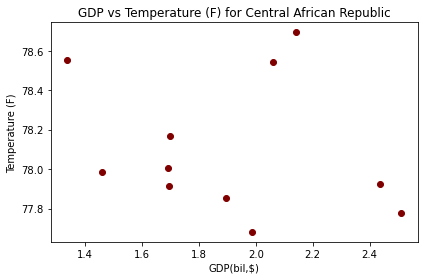

Cov is -0.11657433189175322


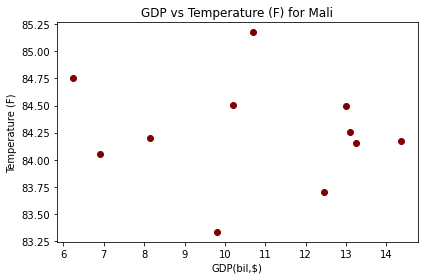

Cov is 0.014601956579951787


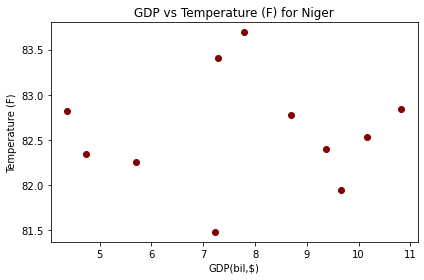

Cov is 0.26106520835930624


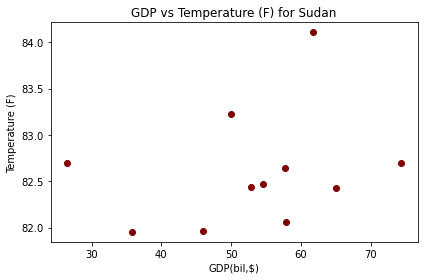

Cov is -0.3808691084447251


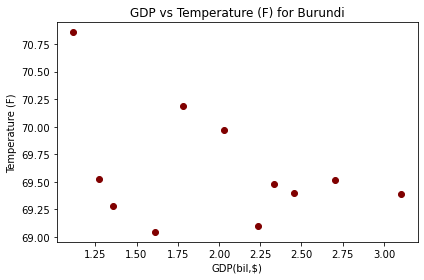

Cov is 0.618454527680757


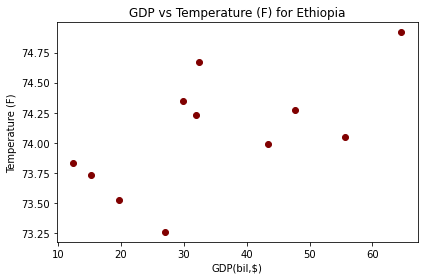

In [5]:
countries = []
correlations = []
for code in agricultural_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP_bd"]
    temp_series = country_df["Temp_Farenheit"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Temp_Farenheit"]
    plt.figure()
    plt.scatter(gdp_series, temp_series, color='Maroon')
    plt.title("GDP vs Temperature (F) for " + str(country_name))
    plt.xlabel("GDP(bil,$)")
    plt.ylabel("Temperature (F)")
    print(f"Cov is {var}")
    plt.tight_layout()
    plt.savefig("output_data/Q3/gdpVtemp_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)
    

Create a Bar Chart Showing Correlation Between GDP and Temp for the top 10 Agriculturally Based Countries of Interest

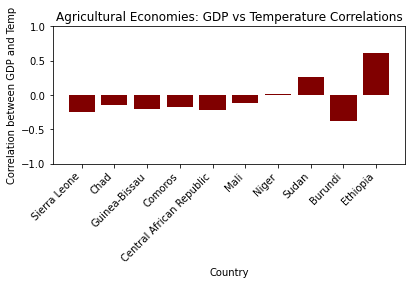

In [6]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations, color='Maroon')
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Temp")
plt.title("Agricultural Economies: GDP vs Temperature Correlations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig("output_data/Q3/correlation_gdpVtemp.png")
plt.show()

Create a GDP vs Rainfall Plot for the top 10 Agriculturally Based Countries of Interest




Cov is 0.126741186171634


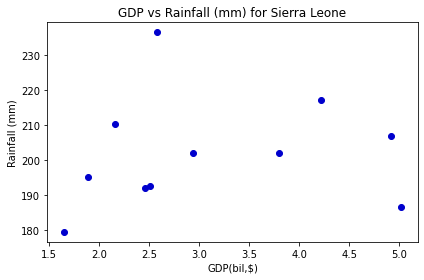

Cov is -0.11967954001902481


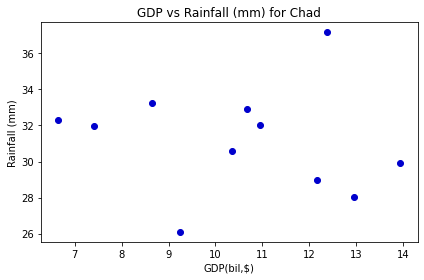

Cov is -0.22527251549312519


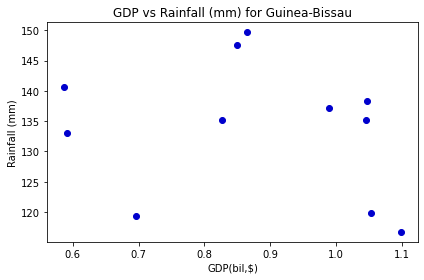

Cov is 0.07959354591402247


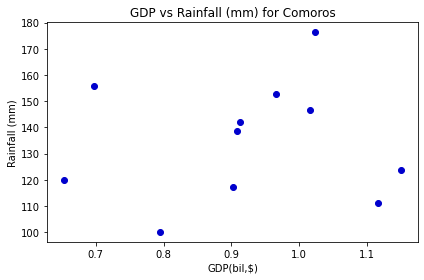

Cov is 0.20485925820869585


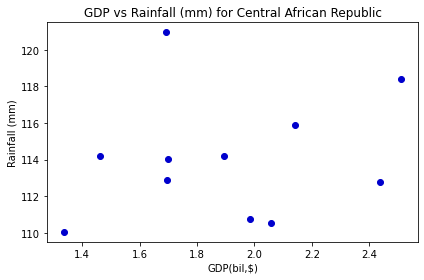

Cov is 0.08675860951755208


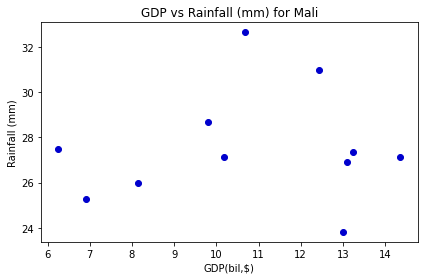

Cov is -0.2615737135468585


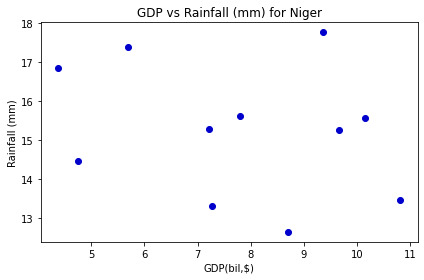

Cov is -0.1455242054145236


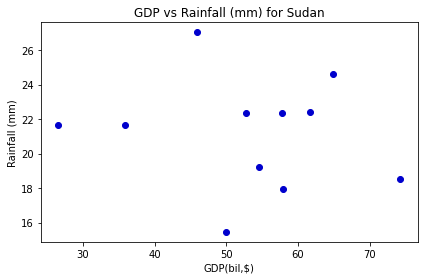

Cov is 0.11368377457690161


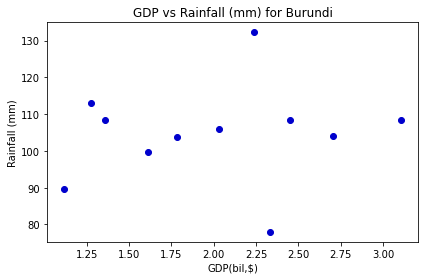

Cov is 0.2769118396172316


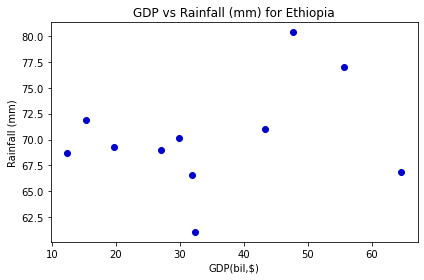

In [7]:
countries = []
correlations = []
for code in agricultural_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP_bd"]
    rain_series = country_df["Rainfall_mm"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Rainfall_mm"]
    plt.figure()
    plt.scatter(gdp_series, rain_series, color='MediumBlue')
    plt.title("GDP vs Rainfall (mm) for " + str(country_name))
    plt.xlabel("GDP(bil,$)")
    plt.ylabel("Rainfall (mm)")
    print(f"Cov is {var}")
    plt.tight_layout()
    plt.savefig("output_data/Q3/gdpVrain_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)
    

Create a Bar Bhart Showing Correlation Between GDP and Temp for the top 10 Agriculturally Based Countries of Interest

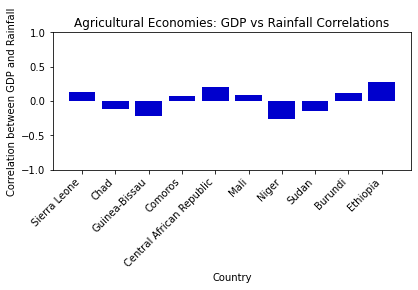

In [8]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations, color='MediumBlue')
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Rainfall")
plt.title("Agricultural Economies: GDP vs Rainfall Correlations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig("output_data/Q3/correlation_gdpVrain.png")
plt.show()